In [14]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [15]:
IMAGE_SIZE = 256
CHANNELS = 3

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 22325 images belonging to 11 classes.


In [17]:
train_generator.class_indices

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Late_blight': 2,
 'Leaf_Mold': 3,
 'Septoria_leaf_spot': 4,
 'Spider_mites Two-spotted_spider_mite': 5,
 'Target_Spot': 6,
 'Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato_mosaic_virus': 8,
 'healthy': 9,
 'powdery_mildew': 10}

In [18]:
class_names = list(train_generator.class_indices.keys())
class_names

['Bacterial_spot',
 'Early_blight',
 'Late_blight',
 'Leaf_Mold',
 'Septoria_leaf_spot',
 'Spider_mites Two-spotted_spider_mite',
 'Target_Spot',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato_mosaic_virus',
 'healthy',
 'powdery_mildew']

In [19]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.17172141 0.39525083 0.21960786]
  [0.17102106 0.39455047 0.21960786]
  [0.1703207  0.39385015 0.21960786]
  ...
  [0.10543722 0.32504508 0.13377848]
  [0.10196079 0.32156864 0.13725491]
  [0.10196079 0.32156864 0.13808252]]

 [[0.17254902 0.39607847 0.21960786]
  [0.17254902 0.39607847 0.21960786]
  [0.17254902 0.39607847 0.21960786]
  ...
  [0.10508704 0.3246949  0.13412866]
  [0.10196079 0.32156864 0.13725491]
  [0.10196079 0.32156864 0.13878289]]

 [[0.17254902 0.39607847 0.21960786]
  [0.17254902 0.39607847 0.21960786]
  [0.17254902 0.39607847 0.21960786]
  ...
  [0.10473686 0.32434472 0.13447884]
  [0.10196079 0.32156864 0.13725491]
  [0.10196079 0.32156864 0.13948323]]

 ...

 [[0.14451896 0.413458   0.13498259]
  [0.14117648 0.4156863  0.12941177]
  [0.14117648 0.4240145  0.11275533]
  ...
  [0.40000004 0.7176471  0.45882356]
  [0.40000004 0.7176471  0.45882356]
  [0.40000004 0.7176471  0.45882356]]

 [[0.14346844 0.4141583  0.1332317 ]
  [0.14117648 0.4156863  0.12941177]


In [20]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 6683 images belonging to 11 classes.


In [21]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 3523 images belonging to 11 classes.


In [22]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5572482  0.53764033 0.56116974]
  [0.5847863  0.56517845 0.58870786]
  [0.5779012  0.55829334 0.58182275]
  ...
  [0.5427562  0.52314836 0.53883463]
  [0.542159   0.5225512  0.53823745]
  [0.5415619  0.52195406 0.53764033]]

 [[0.55784535 0.53823745 0.5617669 ]
  [0.5800091  0.56040126 0.5839307 ]
  [0.57969266 0.5600848  0.58361423]
  ...
  [0.52510357 0.5054957  0.521182  ]
  [0.5209235  0.50131565 0.5170019 ]
  [0.5167434  0.49713558 0.51282185]]

 [[0.5584425  0.53883463 0.56236404]
  [0.5752319  0.55562407 0.5791535 ]
  [0.58148414 0.5618763  0.5854057 ]
  ...
  [0.47996938 0.46036154 0.4760478 ]
  [0.47101212 0.45140427 0.46709055]
  [0.46205488 0.44244704 0.4581333 ]]

 ...

 [[0.40630588 0.4023843  0.42199215]
  [0.40929163 0.40537006 0.42497793]
  [0.4122774  0.40835583 0.42796367]
  ...
  [0.32678187 0.3228603  0.34246814]
  [0.2960271  0.29210553 0.3117134 ]
  [0.27663028 0.2727087  0.29231656]]

 [[0.4243917  0.42047012 0.44007796]
  [0.425586   0.42166442 0.44127226]


In [23]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 11

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 75s 2s/step - loss: 2.3802 - accuracy: 0.1184 - val_loss: 2.3676 - val_accuracy: 0.1042
Epoch 2/20
47/47 [==============================] - 73s 2s/step - loss: 2.3416 - accuracy: 0.1303 - val_loss: 2.3223 - val_accuracy: 0.1354
Epoch 3/20
47/47 [==============================] - 73s 2s/step - loss: 2.1508 - accuracy: 0.1988 - val_loss: 2.0813 - val_accuracy: 0.1510
Epoch 4/20
47/47 [==============================] - 73s 2s/step - loss: 2.0655 - accuracy: 0.2134 - val_loss: 2.0932 - val_accuracy: 0.1771
Epoch 5/20
47/47 [==============================] - 77s 2s/step - loss: 2.0032 - accuracy: 0.2672 - val_loss: 2.2821 - val_accuracy: 0.2188
Epoch 6/20
47/47 [==============================] - 75s 2s/step - loss: 1.8624 - accuracy: 0.3338 - val_loss: 1.7931 - val_accuracy: 0.3906
Epoch 7/20
47/47 [==============================] - 74s 2s/step - loss: 1.7667 - accuracy: 0.3743 - val_loss: 1.5995 - val_accuracy: 0.4375
Epoch 8/20
47/47 [==

In [29]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=30,  # Set this to the total number of epochs (20 + 10)
    initial_epoch=20  # Start from the 20th epoch
)


Epoch 21/30
47/47 [==============================] - 73s 2s/step - loss: 0.9146 - accuracy: 0.6855 - val_loss: 0.8444 - val_accuracy: 0.6979
Epoch 22/30
47/47 [==============================] - 70s 1s/step - loss: 0.9359 - accuracy: 0.6676 - val_loss: 0.8444 - val_accuracy: 0.7240
Epoch 23/30
47/47 [==============================] - 70s 1s/step - loss: 0.9482 - accuracy: 0.6698 - val_loss: 0.9613 - val_accuracy: 0.6667
Epoch 24/30
47/47 [==============================] - 70s 1s/step - loss: 0.8865 - accuracy: 0.6948 - val_loss: 0.9928 - val_accuracy: 0.6458
Epoch 25/30
47/47 [==============================] - 71s 2s/step - loss: 0.9693 - accuracy: 0.6629 - val_loss: 0.8537 - val_accuracy: 0.7188
Epoch 26/30
47/47 [==============================] - 71s 1s/step - loss: 0.8750 - accuracy: 0.7081 - val_loss: 0.6837 - val_accuracy: 0.7656
Epoch 27/30
47/47 [==============================] - 70s 1s/step - loss: 0.8487 - accuracy: 0.6902 - val_loss: 0.9083 - val_accuracy: 0.6823
Epoch 28/30
4

In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=40,  # Total number of epochs (30 initial + 10 more)
    initial_epoch=30  # Start from the 31st epoch
)


Epoch 31/40
47/47 [==============================] - 71s 1s/step - loss: 0.8066 - accuracy: 0.7247 - val_loss: 0.7224 - val_accuracy: 0.7500
Epoch 32/40
47/47 [==============================] - 70s 1s/step - loss: 0.8166 - accuracy: 0.7281 - val_loss: 1.0170 - val_accuracy: 0.6458
Epoch 33/40
47/47 [==============================] - 69s 1s/step - loss: 0.7438 - accuracy: 0.7347 - val_loss: 0.7678 - val_accuracy: 0.7083
Epoch 34/40
47/47 [==============================] - 69s 1s/step - loss: 0.8075 - accuracy: 0.7154 - val_loss: 0.7901 - val_accuracy: 0.7448
Epoch 35/40
47/47 [==============================] - 69s 1s/step - loss: 0.6949 - accuracy: 0.7513 - val_loss: 0.7878 - val_accuracy: 0.7188
Epoch 36/40
47/47 [==============================] - 69s 1s/step - loss: 0.7613 - accuracy: 0.7367 - val_loss: 0.8865 - val_accuracy: 0.7083
Epoch 37/40
47/47 [==============================] - 69s 1s/step - loss: 0.7343 - accuracy: 0.7460 - val_loss: 0.7834 - val_accuracy: 0.7031
Epoch 38/40
4

In [31]:
scores = model.evaluate(test_generator)
scores

111/111 [==============================] - 69s 622ms/step - loss: 0.8732 - accuracy: 0.7034


[0.8732056617736816, 0.7033777832984924]

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

ValueError: x and y must have same first dimension, but have shapes (40,) and (10,)

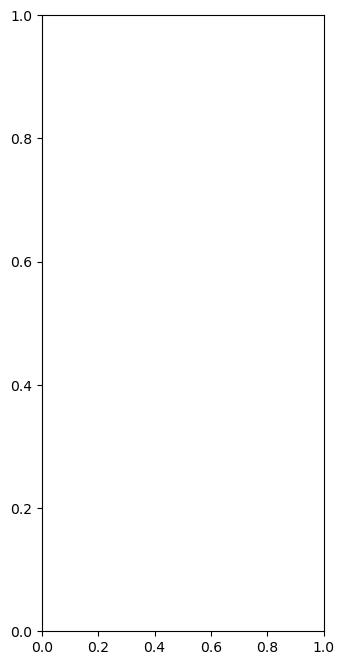

In [36]:
EPOCHS = 40

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_mosaic_virus
1/1 [==============================] - 1s 631ms/step
predicted label: Tomato_mosaic_virus


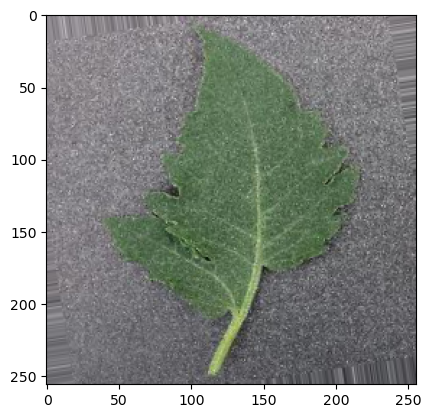

In [37]:
import numpy as np


for images_batch, labels_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 43ms/step


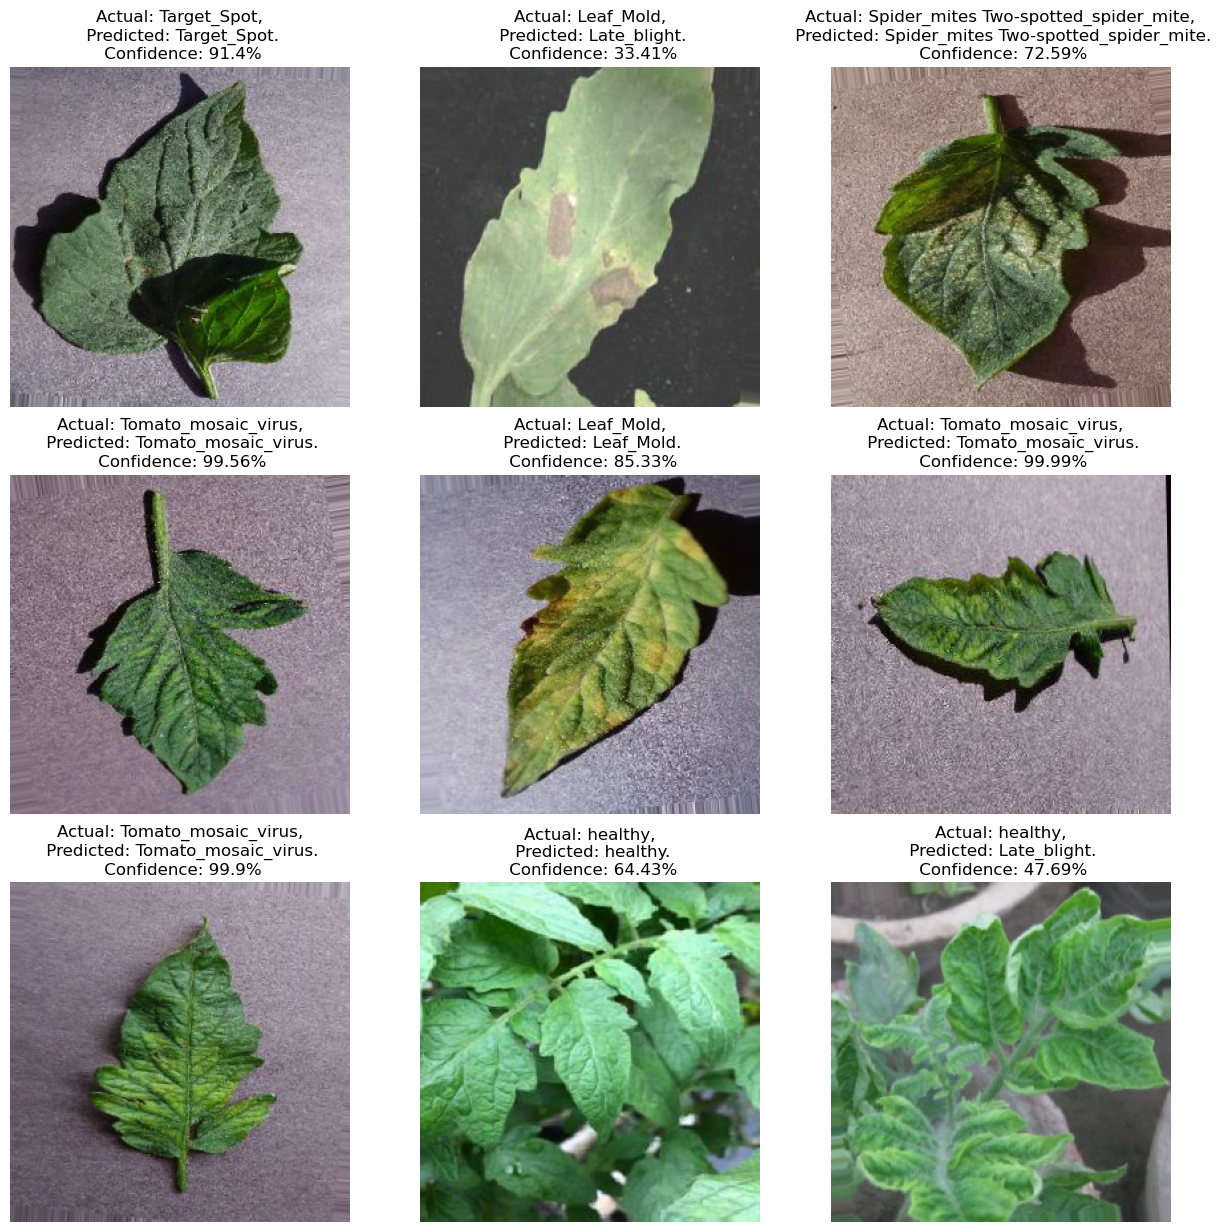

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [40]:
model.save("tomato.h5")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
